# Evalaute data

In [4]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

import sys
from joblib import load
sys.path.append('../')
from sklearn import metrics, tree

from src.data_loader import load_test_dataset
from src.evaluation import evaluate_score, display_all_trees_metrics
import matplotlib.gridspec as gridspec

from joblib import load
from sklearn.metrics import classification_report
pd.set_option('display.width', 1000)  
pd.set_option('display.max_colwidth', 200) 

In [5]:
IMAGES_PATH_TO_SAVE = '../images/'
TITLE_SIZE=20
XTICKS_SIZE=14

### Export results

In [6]:
results_df = pd.read_csv("../experiments/results-tunned.csv")
results_df.head(5)

,model,scaler,cv,best_params,best_score,model_path
0,random_forest,standard,kfold,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}",0.999730,../experiments/models-tunned/random_forest_standard_kfold_best.joblib
1,random_forest,standard,stratified_kfold,"{'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 200}",0.999714,../experiments/models-tunned/random_forest_standard_stratified_kfold_best.joblib
2,random_forest,standard,shuffle,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}",0.999698,../experiments/models-tunned/random_forest_standard_shuffle_best.joblib
3,random_forest,minmax,kfold,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}",0.999587,../experiments/models-tunned/random_forest_minmax_kfold_best.joblib
4,random_forest,minmax,stratified_kfold,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}",0.999524,../experiments/models-tunned/random_forest_minmax_stratified_kfold_best.joblib


### Find best combo for train dataset


In [7]:
best_combo = results_df.loc[results_df["best_score"].idxmax()]
print(f"Best accuracy: {best_combo['best_score']}")
best_combo, best_combo['best_params']

Best accuracy: 0.9997380394816124


(model                                                                                  random_forest
 scaler                                                                                        robust
 cv                                                                                             kfold
 best_params    {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
 best_score                                                                                  0.999738
 model_path                       ../experiments/models-tunned/random_forest_robust_kfold_best.joblib
 Name: 6, dtype: object,
 "{'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}")

### Show metrics form the best model

/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying t

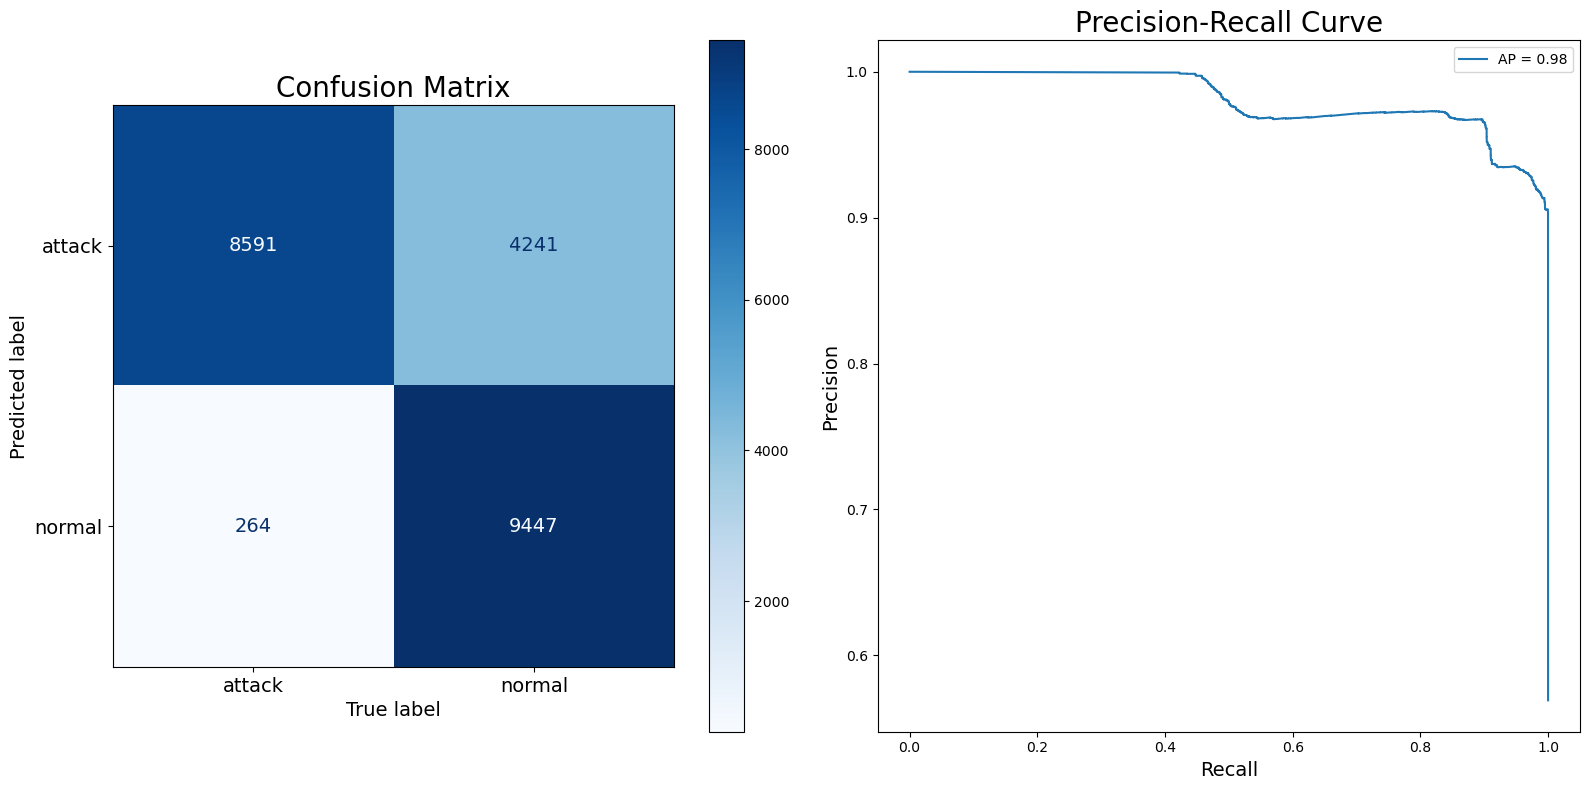

[{'random_forest': {'accuracy': 0.8001596948054829,
   'precision': 0.9701863354037267,
   'recall': 0.6694981296758105,
   'f1': 0.7922718679393185,
   'auc_roc': 0.8211562319679641,
   'log_loss': 7.2029746936065635,
   'best_params': "{'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}"}}]

In [8]:
best_model = load(best_combo['model_path'])
X_test, y_test = load_test_dataset(split=True, purpose='modelling')
y_pred = best_model.predict(X_test)
kernel_evals = []
evaluate_score(list_to_fill=kernel_evals, 
               model_name=best_combo['model'], 
               model=best_model, 
               y_pred=y_pred, 
               y_test=y_test, 
               X_test=X_test, 
               best_params=best_combo['best_params'],
               filename='random_forest_evaluation.png')
kernel_evals

### Receive top 100 best models by Validation Accuracy

In [9]:
top_100_df = results_df.nlargest(100, "best_score")
print("Top 100 Models by Validation Accuracy:")
top_100_df.head(10)

Top 100 Models by Validation Accuracy:


,model,scaler,cv,best_params,best_score,model_path
6,random_forest,robust,kfold,"{'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.999738,../experiments/models-tunned/random_forest_robust_kfold_best.joblib
0,random_forest,standard,kfold,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}",0.999730,../experiments/models-tunned/random_forest_standard_kfold_best.joblib
1,random_forest,standard,stratified_kfold,"{'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 200}",0.999714,../experiments/models-tunned/random_forest_standard_stratified_kfold_best.joblib
2,random_forest,standard,shuffle,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}",0.999698,../experiments/models-tunned/random_forest_standard_shuffle_best.joblib
7,random_forest,robust,stratified_kfold,"{'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}",0.999698,../experiments/models-tunned/random_forest_robust_stratified_kfold_best.joblib
8,random_forest,robust,shuffle,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}",0.999603,../experiments/models-tunned/random_forest_robust_shuffle_best.joblib
3,random_forest,minmax,kfold,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}",0.999587,../experiments/models-tunned/random_forest_minmax_kfold_best.joblib
5,random_forest,minmax,shuffle,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 50}",0.999540,../experiments/models-tunned/random_forest_minmax_shuffle_best.joblib
4,random_forest,minmax,stratified_kfold,"{'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}",0.999524,../experiments/models-tunned/random_forest_minmax_stratified_kfold_best.joblib
16,decision_tree,robust,stratified_kfold,"{'model__max_depth': None, 'model__min_samples_split': 2}",0.999222,../experiments/models-tunned/decision_tree_robust_stratified_kfold_best.joblib


In [10]:
def evaluate_df_and_return_df(input_df):
    kernel_evals = []
    for idx, top_df in input_df.iterrows():
        best_model = load(top_df['model_path'])
        y_pred = best_model.predict(X_test)   
        evaluate_score(list_to_fill=kernel_evals, model_name=top_df['model'], model=best_model, y_pred=y_pred, y_test=y_test, X_test=X_test, plots=False, best_params=top_df['best_params'])
    
    data = []
    for id, entry in enumerate(kernel_evals):
        for model_name, metrics in entry.items():
            data.append({
                "id": id, 
                "name": model_name,
                "accuracy": metrics["accuracy"],
                "precision": metrics["precision"],
                "recall": metrics["recall"],
                "f1": metrics["f1"],
                "auc_roc": metrics["auc_roc"],
                "log_loss": metrics["log_loss"],
                "best_params": metrics["best_params"]
            })
    return pd.DataFrame(data)

In [11]:
top_100_df_sorted = evaluate_df_and_return_df(top_100_df)


/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying t

In [12]:
top_100_df_sorted = top_100_df_sorted.sort_values(by="accuracy", ascending=False)
top_100_df_sorted.head(10)

,id,name,accuracy,precision,recall,f1,auc_roc,log_loss,best_params
9,9,decision_tree,0.863195,0.970010,0.783900,0.867080,0.875937,4.930960,"{'model__max_depth': None, 'model__min_samples_split': 2}"
11,11,decision_tree,0.862751,0.970071,0.783042,0.866580,0.875560,4.946949,"{'model__max_depth': 20, 'model__min_samples_split': 2}"
23,23,decision_tree,0.851218,0.932627,0.796135,0.858993,0.860069,5.362659,"{'model__max_depth': 20, 'model__min_samples_split': 2}"
10,10,decision_tree,0.850996,0.971810,0.760287,0.853133,0.865572,5.370653,"{'model__max_depth': None, 'model__min_samples_split': 2}"
13,13,decision_tree,0.849488,0.968809,0.760053,0.851828,0.863859,5.425015,"{'model__max_depth': None, 'model__min_samples_split': 2}"
21,21,decision_tree,0.847758,0.932622,0.789589,0.855165,0.857105,5.487372,"{'model__max_depth': 20, 'model__min_samples_split': 2}"
14,14,decision_tree,0.847403,0.971865,0.753741,0.849017,0.862454,5.500163,"{'model__max_depth': None, 'model__min_samples_split': 5}"
12,12,decision_tree,0.846072,0.968850,0.753819,0.847914,0.860897,5.548129,"{'model__max_depth': None, 'model__min_samples_split': 2}"
22,22,decision_tree,0.841104,0.931276,0.778289,0.847937,0.851198,5.727204,"{'model__max_depth': None, 'model__min_samples_split': 2}"
34,34,svm,0.836978,0.924998,0.776574,0.844313,0.846685,5.875901,"{'model__C': 1, 'model__loss': 'squared_hinge', 'model__penalty': 'l2'}"


## Compare decisions trees

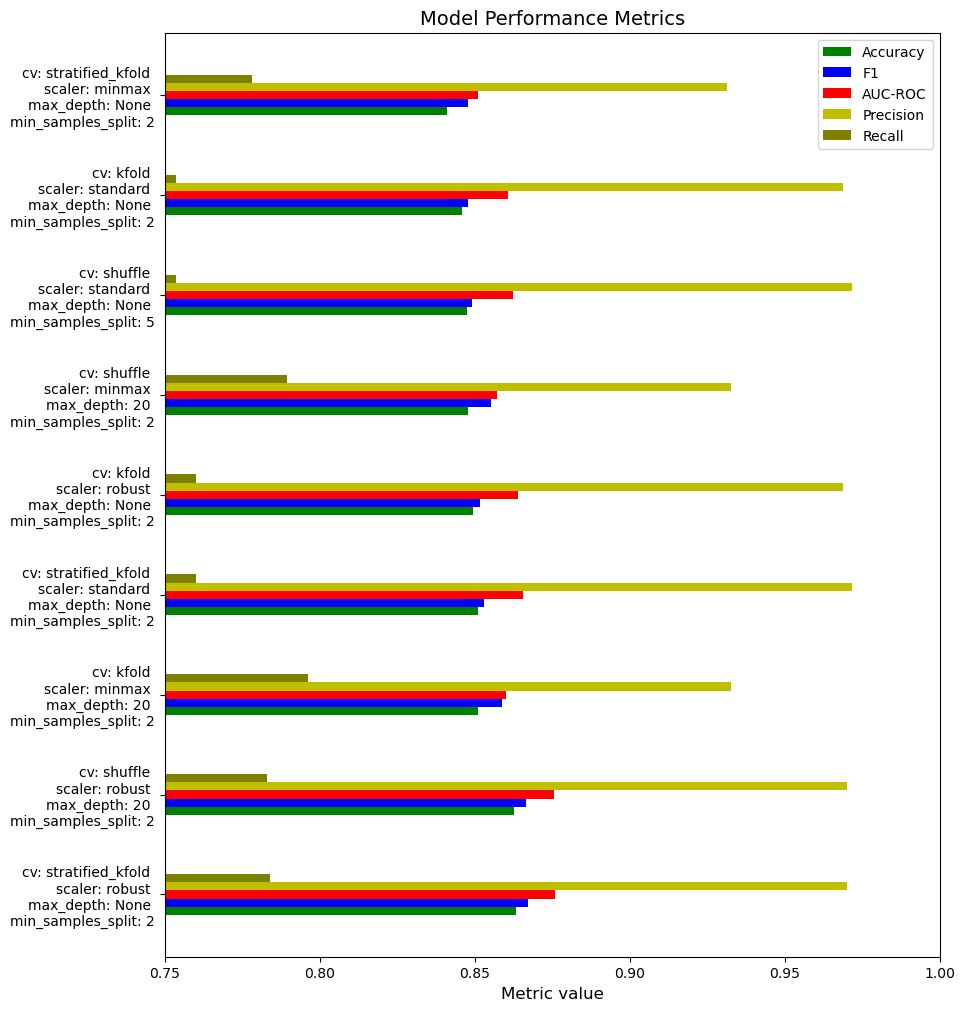

In [13]:
display_all_trees_metrics(
    trees_metrics_df=top_100_df_sorted[top_100_df_sorted["name"] == "decision_tree"], 
    all_trees=top_100_df,
    filename='decision_tree_performance_hyperparameters.png')

## Explore the best model on test dataset

In [14]:
best_of_the_best = top_100_df.iloc[9]
best_of_the_best

model                                                                           decision_tree
scaler                                                                                 robust
cv                                                                           stratified_kfold
best_params                         {'model__max_depth': None, 'model__min_samples_split': 2}
best_score                                                                           0.999222
model_path     ../experiments/models-tunned/decision_tree_robust_stratified_kfold_best.joblib
Name: 16, dtype: object

/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RobustScaler from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/montare/miniconda3/envs/ml-research-py310/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying t

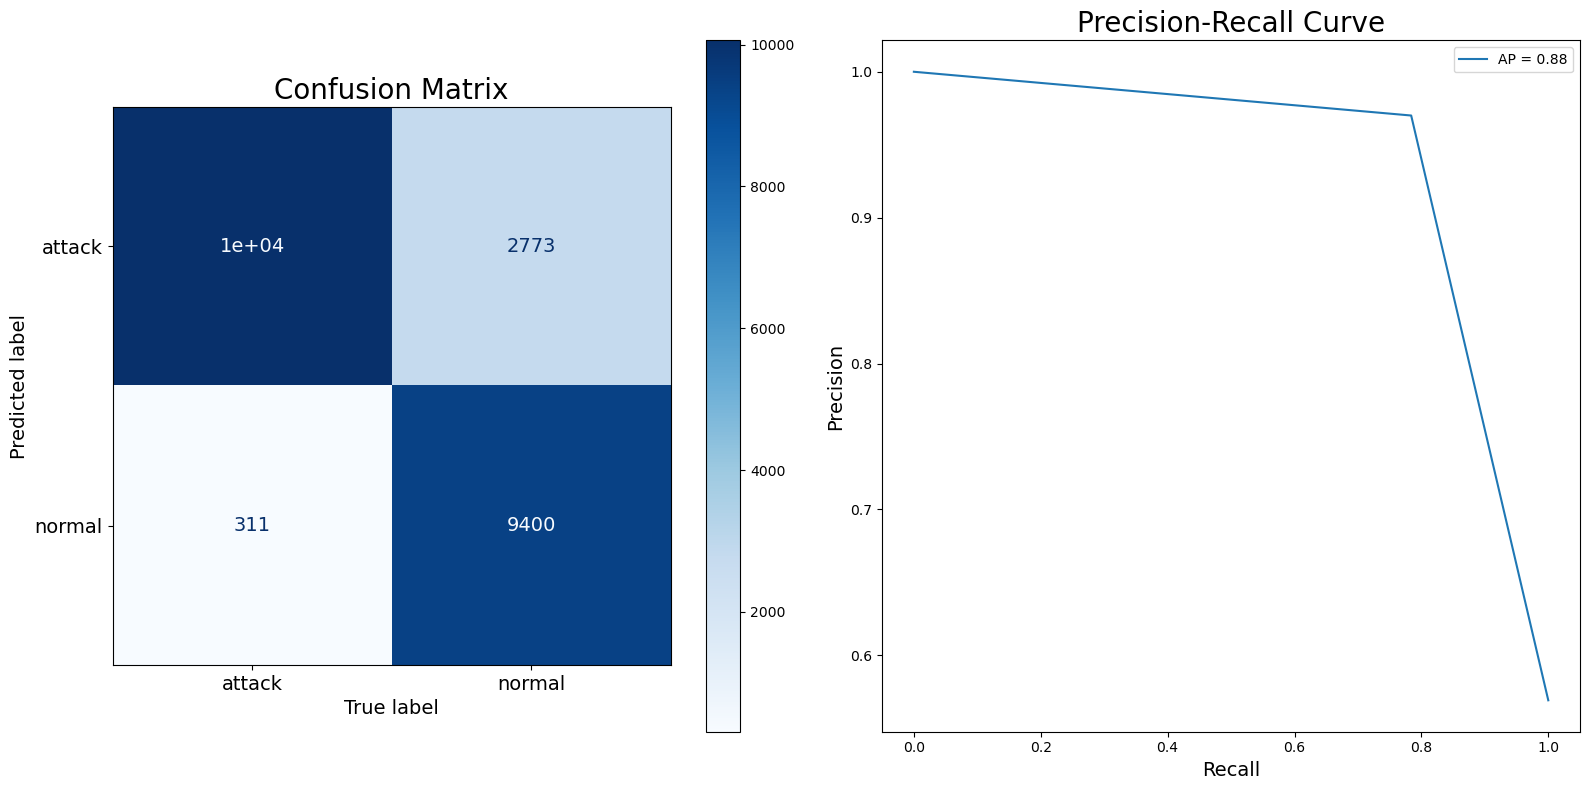

[{'decision_tree': {'accuracy': 0.8631947833030209,
   'precision': 0.9700096432015429,
   'recall': 0.783899625935162,
   'f1': 0.8670804241013705,
   'auc_roc': 0.8759370439427637,
   'log_loss': 4.930959812448976,
   'best_params': "{'model__max_depth': None, 'model__min_samples_split': 2}"}}]

In [15]:
best_of_the_best_model = load(best_of_the_best['model_path'])
y_pred = best_of_the_best_model.predict(X_test)
kernel_evals = []
evaluate_score(list_to_fill=kernel_evals, 
               model_name=best_of_the_best['model'], 
               model=best_of_the_best_model, 
               y_pred=y_pred, 
               y_test=y_test, 
               X_test=X_test, 
               best_params=best_of_the_best['best_params'],
               filename='decision_tree_best_results.png')
kernel_evals

## Draw decision tree

In [32]:
if str(best_of_the_best_model.named_steps['model']) == 'DecisionTreeClassifier()':
    import graphviz
    from sklearn.tree import export_graphviz


    dot_data = export_graphviz(best_of_the_best_model.named_steps['model'], 
                            out_file=None, 
                            feature_names=X_test.columns, 
                            class_names=[str(cls) for cls in best_of_the_best_model.named_steps['model'].classes_], 
                            filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree_best", format="png", cleanup=True)